# COMM 160DS - Sentiment Analysis on Mainstream Video Game Tweets
#### by Issac Martinez, Jim Guo, Goar Saroyan, Keeley Stone, Vik Zhou

# Introduction 

As the video game industry growing rapidly with active player communities, social media comments became an important source for marketers to learn how they can better cater their products to their consumers. Sentiment analysis can be an useful tool for reputation management, targeted marketing campaigns, and competitor analysis, as sentiment analysis shows a clear view of the sentimental polarity through comments and compare the differences across different subjects. Therefore, we chose to conduct a sentiment analysis on mainstream games with a group of Twitter data on user comments in order to understand the current climate of the game market by using Vader on the sentiments and the built manually marked sentiment counts. 

### This project is about analyzing Twitter tweets' sentiments about a selection of video games. The video games to be analyzed are: 
##### Borderlands, Call of Duty Black Ops Cold War, Overwatch, NBA2k, Dota 2, World of War Craft, CS-GO, Assasin's Creed, Apex Legends, League of Legends, Fortnite, Battlefield, Heartstone, PUB G, FIFA, RDR, Rainbow Six, GTA, Madden NFL, Cyberpunk 2077, Ghost Recon, and Hearthstone. 
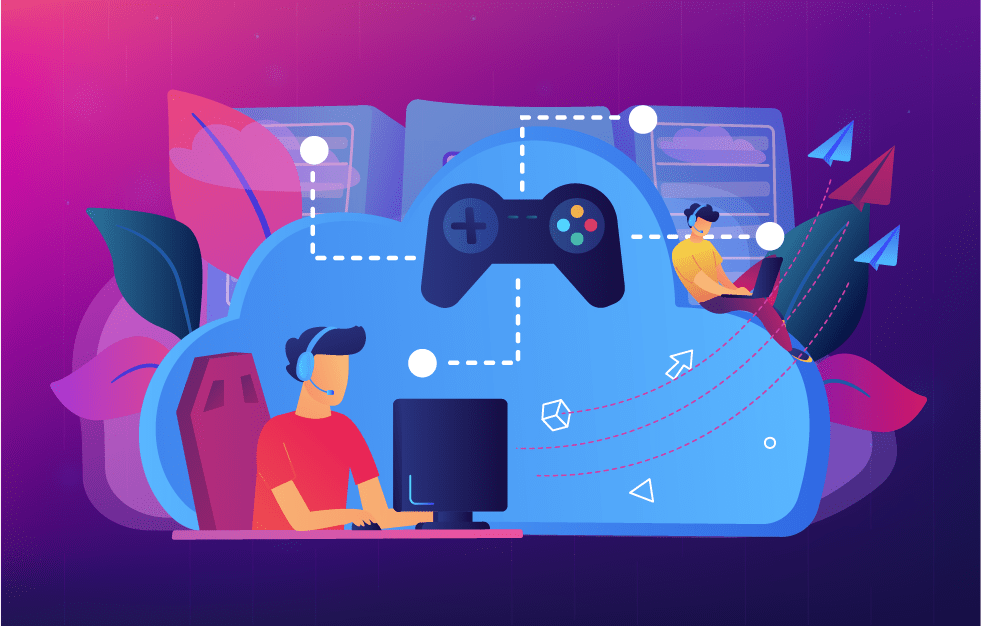

# Research Question
##### Which video game will have the most positive and negative sentiment analysis on Twitter using the built (already provided) in sentiment?
##### Which video game will have the most postivie and negative sentiment analysis using Sentiment_vader?
##### Will the game that has the most positive sentiment( from vader ) also have the tweet with the most positive sentiment score?



# Dataset Description

### Description 
This data set was orginally taken from the website Kaggle. It contains a list of twitter user ids, the names of a variety of video games, an already predetermined sentiment, and finally the tweets from the corresponding twitter users. These tweets contain the users opinions and thoughts on specific video games. With these opinions ranging from good thoughts, bad thoughts, and neutral thoughts. 

In [1]:
# Install necessary libraries
!pip install nltk
!pip install -U textblob

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached regex-2023.6.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (770 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)


In [2]:
# import necessary functions required for a reproducibile sentiment analysis using social media data
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import re

#### df.describe - rename columns,

In [3]:
# convert the csv with comments to Pandas Datafram (vg stands for video game) 
vg = pd.read_csv('twitter_training.csv')

In [4]:
# display the ordered data from the top
vg.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
# rename columns to clear categories
vg.rename(columns={'2401': 'Sentiment_Batch', 'Borderlands': 'Video_Game', 'Positive': 'Sentiment', 'im getting on borderlands and i will murder you all ,': 'Tweet'}, inplace=True)

In [6]:
# display renamed ordered data from the top
vg.head()

,Sentiment_Batch,Video_Game,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
# generate descriptive statistics, display data distribution summary
vg.describe()

,Sentiment_Batch
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


# Preprocessing

In [8]:
# Drop Missing Data
vg.dropna(inplace=True)

# Drop Duplicates
vg.drop_duplicates()


,Sentiment_Batch,Video_Game,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [9]:
# delete irrelevant subjects
values_to_delete = ['Nvidia', 'johnson&johnson','Facebook', 'HomeDepot', 'Verizon', 'Microsoft', 'Google', 'PlayStation5(PS5)', 'Xbox(Xseries)', 'Amazon']
filtered_vg = vg[~vg['Video_Game'].isin(values_to_delete)]

In [10]:
# delete "Irrelevant" sentiment values in the built-in sentiment
values_to_delete1 = ['Irrelevant']
filtered_vg2= filtered_vg[~filtered_vg['Sentiment'].isin(values_to_delete1)]

In [11]:
# text cleaning - remove mentions, signs, spaces, and unknown values
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'http\S+|www\S+|https\S+|pic\S+', '', text, flags=re.MULTILINE)  # remove URLs
        text = re.sub(r'@\w+', '', text)  # remove mentions
        text = re.sub(r'\s*@+\s*', ' ', text) # remove mentions with extra spaces
        text = re.sub(r'#\w+', '', text)  # remove hashtags
        text = re.sub(r'\s+', ' ', text)  # remove extra spaces
        text = re.sub(r'-', '', text) #remove hyphens
        text = re.sub(r'[><]', '', text) #remove greater/less than signs
        text = re.sub(r'[\\/]', '', text) #remove /\ signs
        text = re.sub(r'\.', '', text) # remove "."
        text = re.sub(r'\,', '', text) #remove ","
        text = re.sub(r'unk', '', text) # remove "unk"        
        return text.strip()
    else:
        return text
    

filtered_vg2['Clean_Text'] = filtered_vg2['Tweet'].apply(clean_text)

/tmp/ipykernel_99/2207864593.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_vg2['Clean_Text'] = filtered_vg2['Tweet'].apply(clean_text)


In [12]:
# delete useless columns
columns_to_delete = ['Sentiment_Batch', 'Tweet'] 
sentiment_data = filtered_vg2.drop(columns=columns_to_delete)

# Analysis

In [13]:
# Define a function for sentiment analysis using NLTK's Vader
def get_sentiment_vader(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] > 0.05:
        return "Positive"
    elif sentiment['compound'] < -0.05:
        return "Negative"
    else:
        return "Neutral"
    
def get_sent_vader_cont(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)['compound']


In [14]:
# create new column to store sentiment analysis results from applying the function to the cleaned text 
sentiment_data["Sentiment_vader"] = sentiment_data["Clean_Text"].apply(get_sentiment_vader)
sentiment_data["Vader_count"]= sentiment_data["Clean_Text"].apply(get_sent_vader_cont)


In [16]:
# display preview of final cleaned sentiment analysis
sentiment_data.head()

,Video_Game,Sentiment,Clean_Text,Sentiment_vader,Vader_count
0,Borderlands,Positive,I am coming to the borders and I will kill you...,Negative,-0.6908
1,Borderlands,Positive,im getting on borderlands and i will kill you all,Negative,-0.6908
2,Borderlands,Positive,im coming on borderlands and i will murder you...,Negative,-0.6908
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,Negative,-0.6908
4,Borderlands,Positive,im getting into borderlands and i can murder y...,Negative,-0.6908


# Visualization

#### Create a customer palette

In [17]:
# Define the colors for positive and negative sentiments
sentiment_colors = {
    'Positive': 'green',
    'Negative': 'red',
    'Neutral' : 'blue'
}

#### Create a histplot

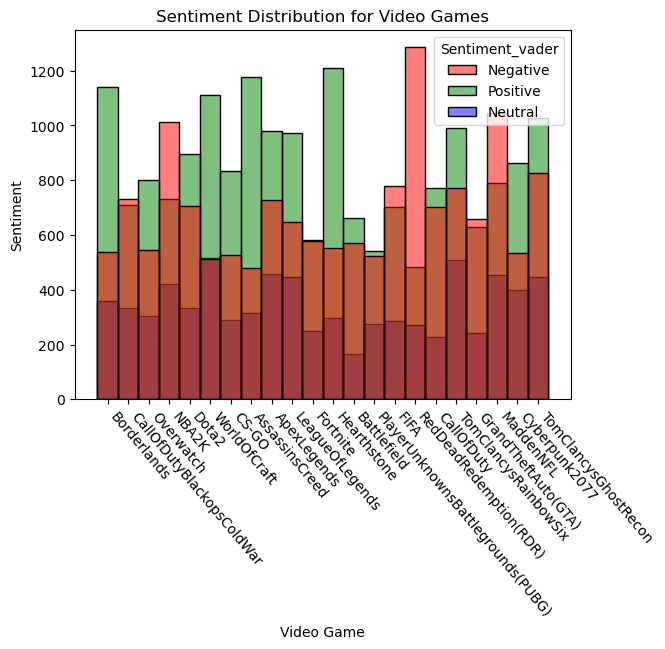

In [18]:
# Use function from Seaborn library to create a histogram graph illustrating the overall sentiment distribution of all games.
sns.histplot(x='Video_Game', hue='Sentiment_vader', data=sentiment_data, palette=sentiment_colors)
plt.xticks(rotation= -50, ha='left')
plt.xlabel('Video Game')
plt.ylabel('Sentiment')
plt.title('Sentiment Distribution for Video Games')
plt.show()

#### Create a catplot array with countplots for each video games sentiments for Sentiment_vader

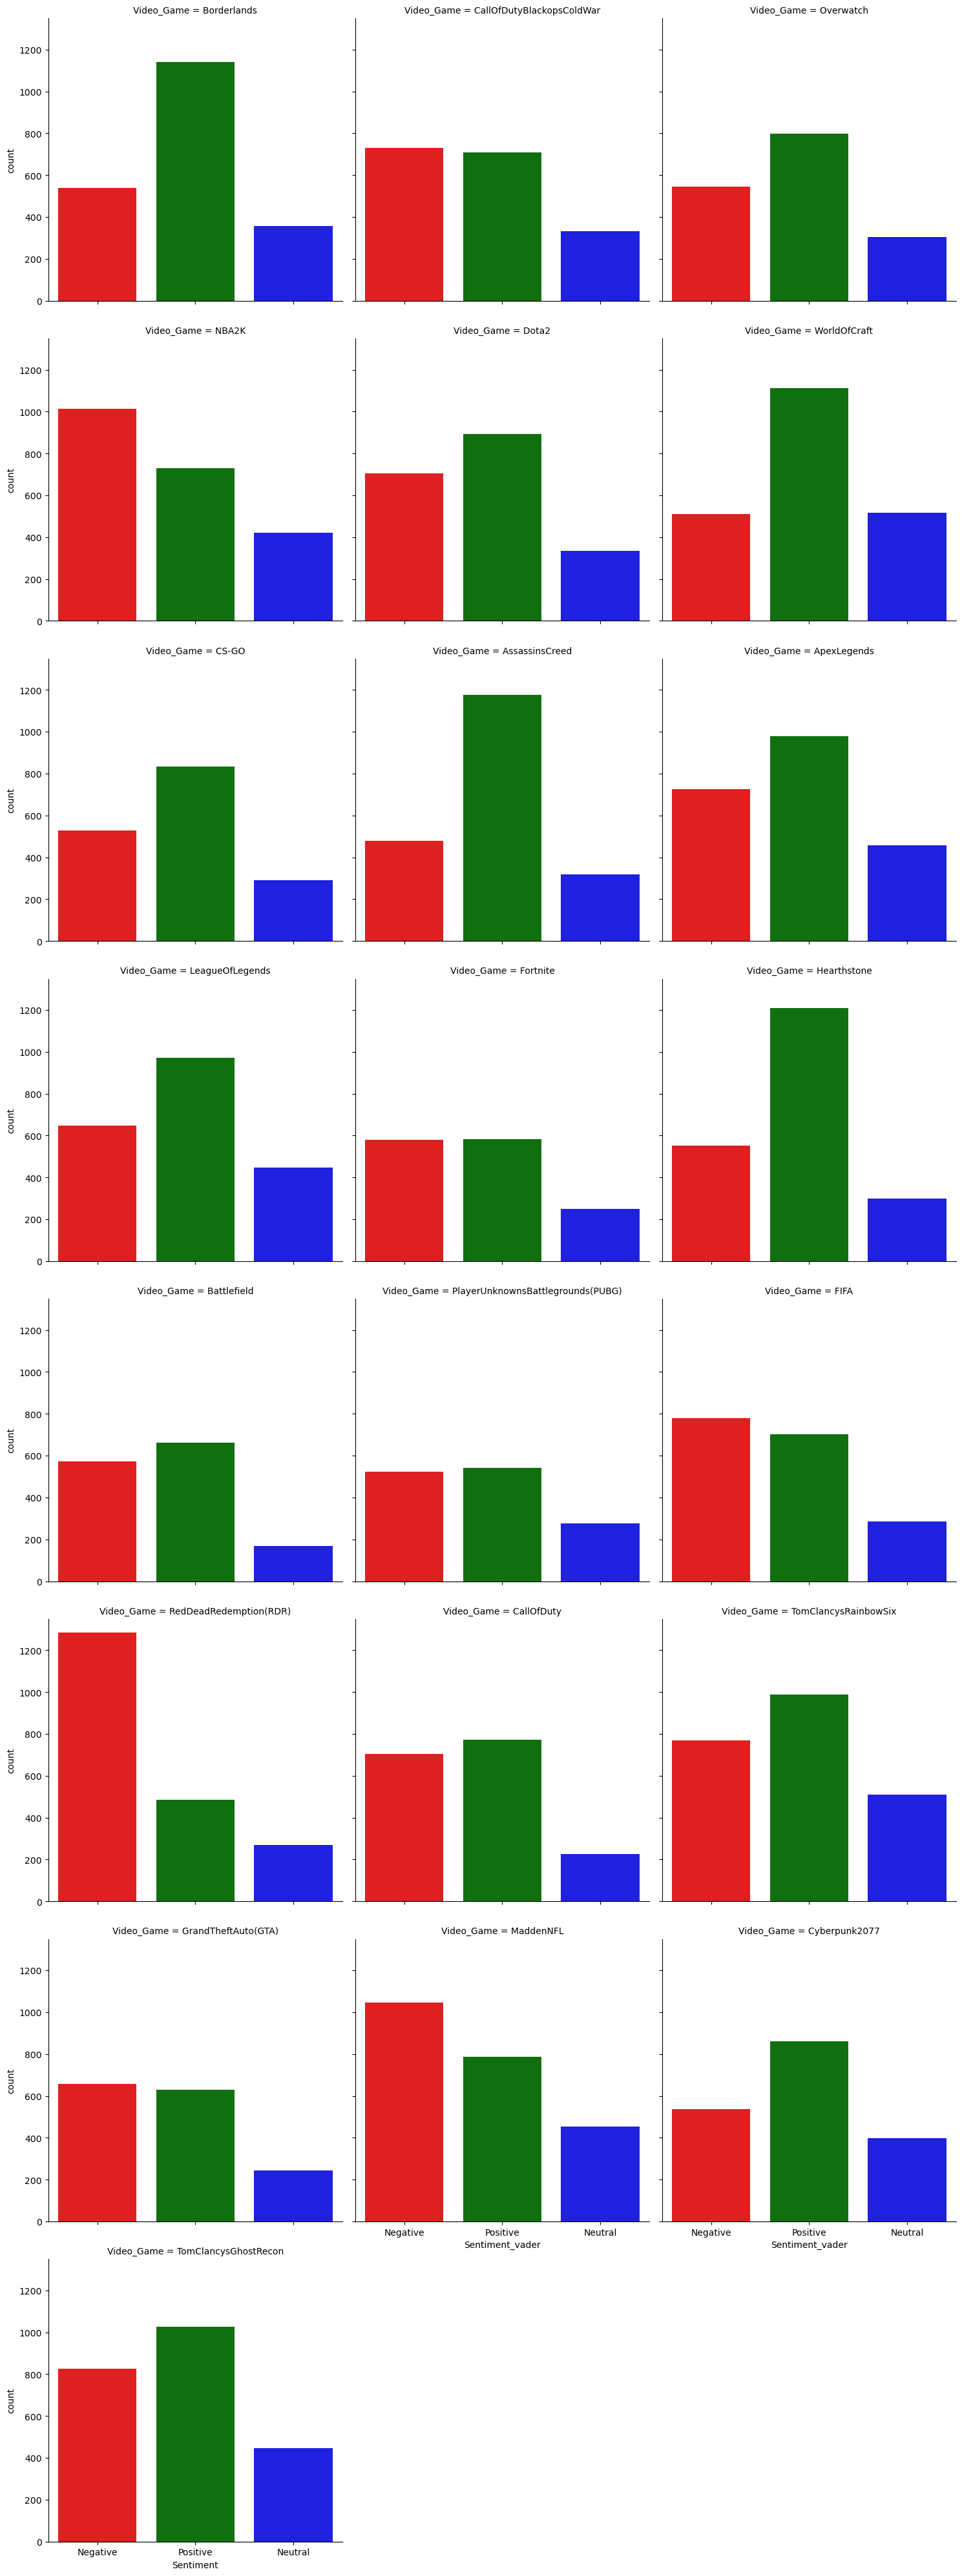

In [19]:
# use function from Seaborn library to create juxtaposable categorical plots illustrating sentiment distribution of individual games. 
sns.catplot(data=sentiment_data, kind= "count", col='Video_Game', x= 'Sentiment_vader', col_wrap=3,palette=sentiment_colors)
plt.xlabel('Sentiment')
plt.show()

#### Create a catplot array with countplots for each video games sentiments from the built-in data

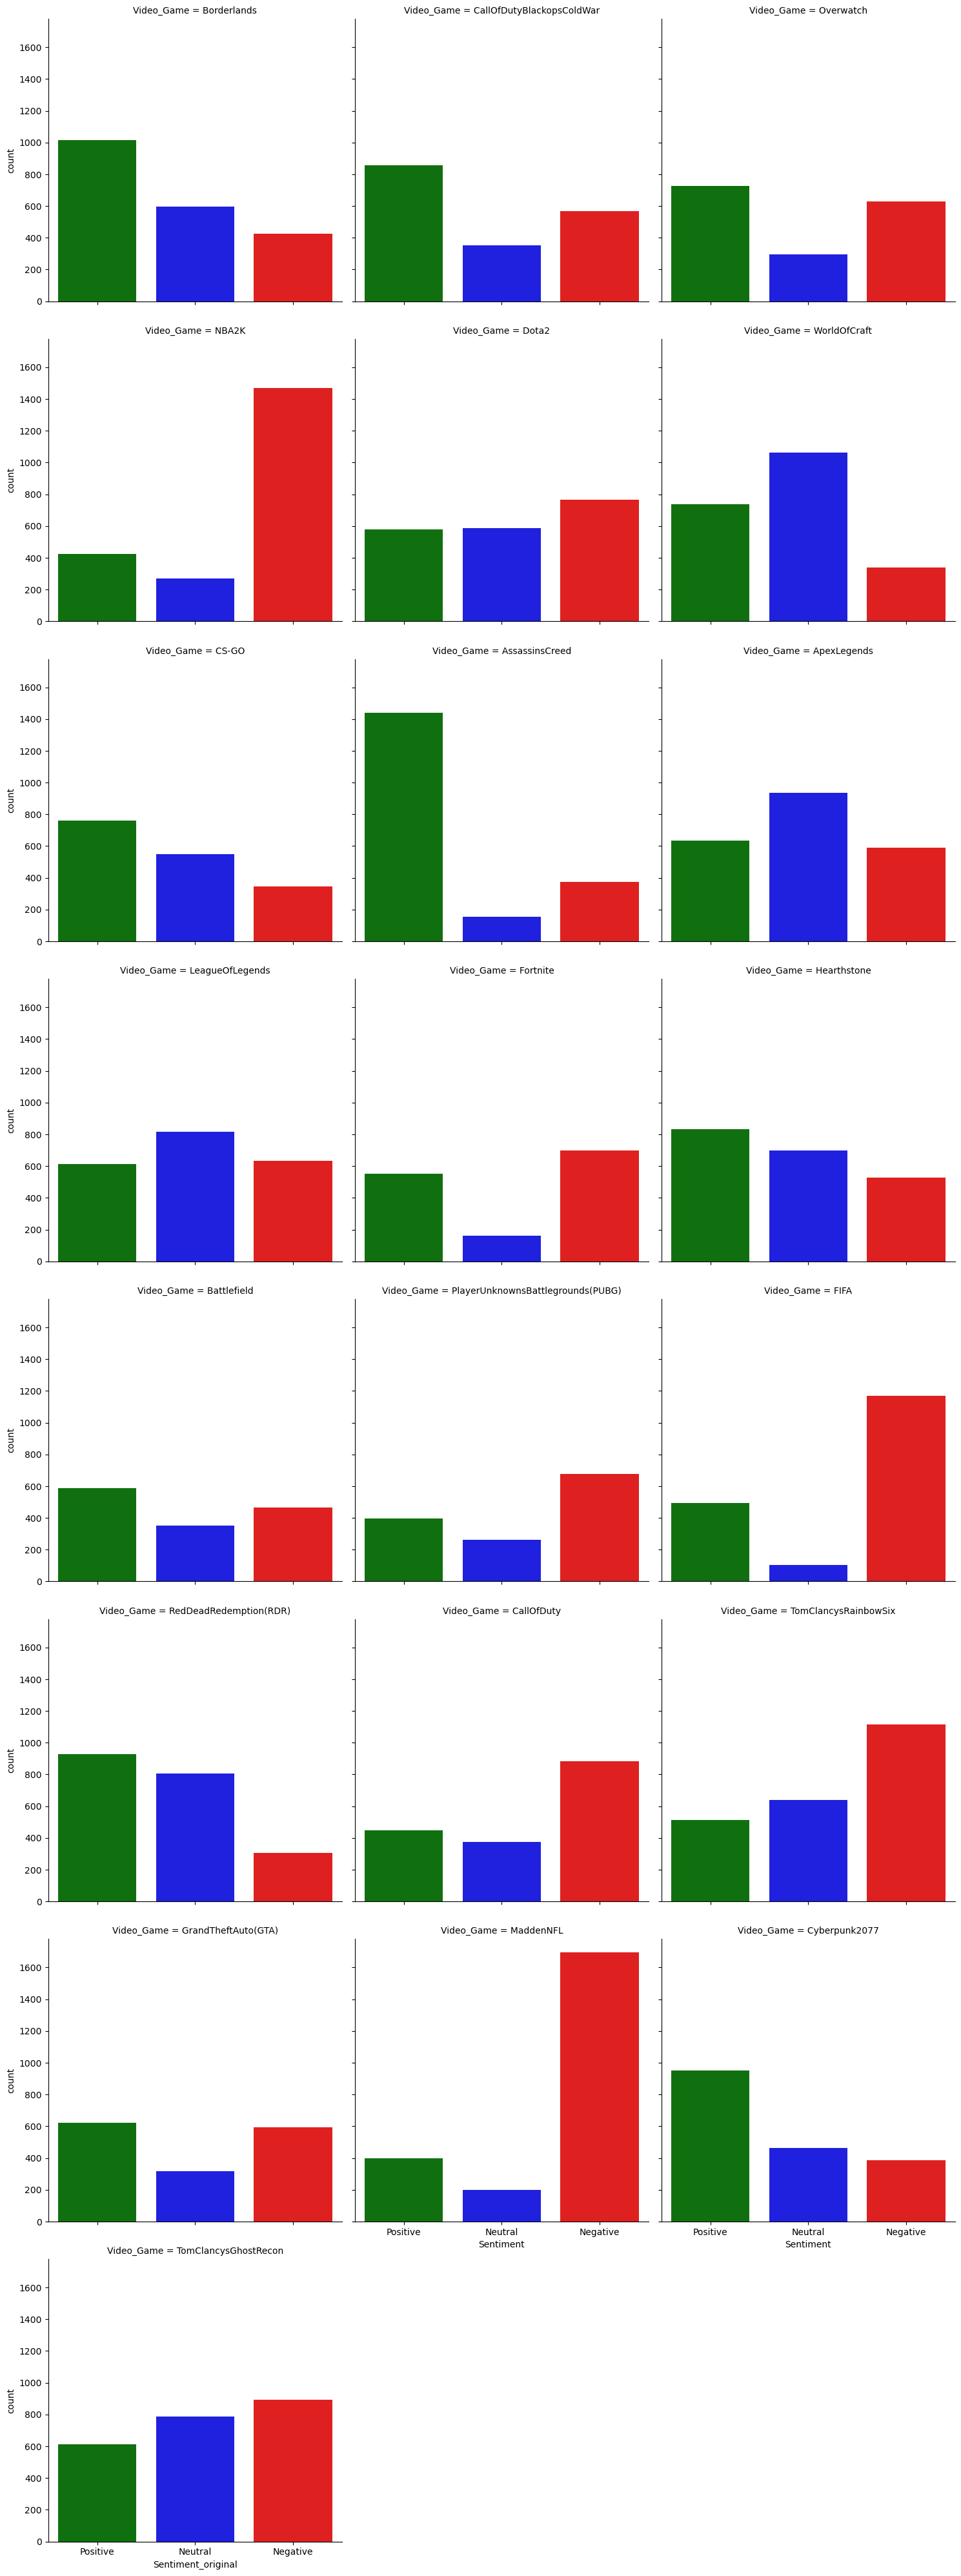

In [20]:
# use function from Seaborn library to create juxtaposable categorical plots illustrating sentiment distribution of individual games with built in sentiment"
sns.catplot(data=sentiment_data, kind= "count", col='Video_Game', x= 'Sentiment', col_wrap=3, palette=sentiment_colors)
plt.xlabel('Sentiment_original')
plt.show()

#### Create a scatterplot to visualize all the video games Sentiment_vader scores

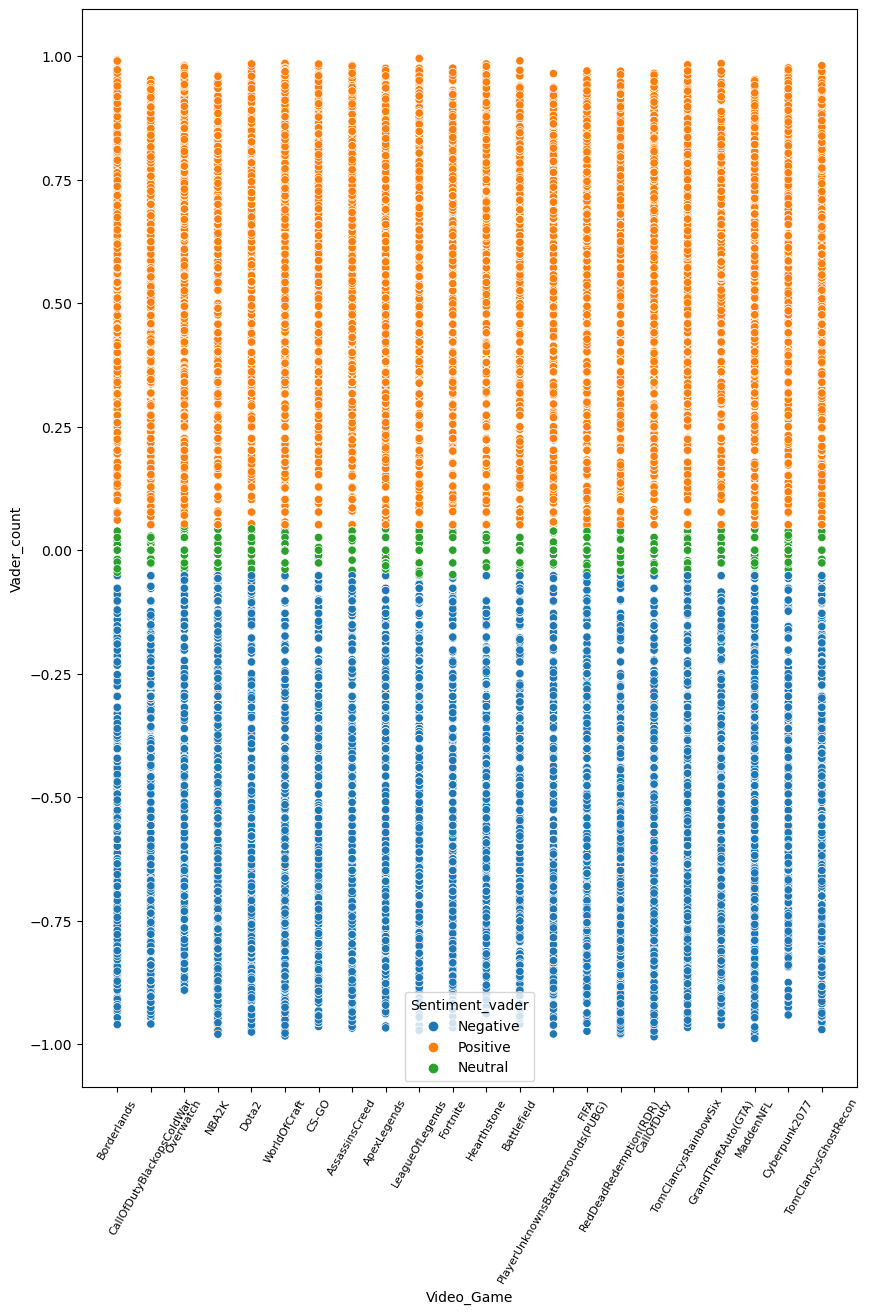

In [21]:
plt.figure(figsize=(10,14))
sns.scatterplot(data=sentiment_data, x="Video_Game", y="Vader_count", hue="Sentiment_vader")
plt.xticks(rotation=60)
plt.xticks(fontsize=8)
plt.show()

# Results/Findings

### Finds the game with the tweet that had the highest vader sentiment score

In [22]:
sentiment_data.sort_values(by ="Vader_count", ascending=False).head(1)

,Video_Game,Sentiment,Clean_Text,Sentiment_vader,Vader_count
32593,LeagueOfLegends,Positive,playing in 03% league tile Clothing is SO enjo...,Positive,0.9957


#### Define function to find which video game has the most positive sentiment analyses from Sentiment_Vader

In [23]:
def count_most_occurrences(df, target_column, search_column, search_string):
    # Filter the DataFrame to include only rows where the search column contains the search string
    filtered_sentiment_data = sentiment_data[sentiment_data['Sentiment_vader'].str.contains("Positive", case=False, na=False)]
    
    # Count the occurrences of each value in the target column
    counts = filtered_sentiment_data['Video_Game'].value_counts()
    
    # Get the value with the highest count
    most_common_value = counts.idxmax()
    
    return most_common_value

#### Define function to find which video game has the most positive sentiment analyses from the built-in data

In [24]:
def count_most_occurrences1(df, target_column, search_column, search_string):
    # Filter the DataFrame to include only rows where the search column contains the search string
    filtered_sentiment_data = sentiment_data[sentiment_data['Sentiment'].str.contains("Positive", case=False, na=False)]
    
    # Count the occurrences of each value in the target column
    counts = filtered_sentiment_data['Video_Game'].value_counts()
    
    # Get the value with the highest count
    most_common_value = counts.idxmax()
    
    return most_common_value

### Use the functions to find the answer to which video game has the most positive analyses for each sentiment function

#### Most positive game based off of Vader

In [25]:
most_common_positive = count_most_occurrences(sentiment_data, 'Video_Game', 'Sentiment_vader', "Positive")
most_common_positive

'Hearthstone'

#### Most positive game based off of the built in sentiment analysis

In [26]:
most_common_positive1 = count_most_occurrences1(sentiment_data, 'Video_Game', 'Sentiment', "Positive")
most_common_positive1

'AssassinsCreed'

#### Make new functions that tells us the # of each sentiment analysis that Hearthstone has

In [27]:
Hearthstone_filter = sentiment_data[sentiment_data['Video_Game'] == 'Hearthstone']
Hearthstone = Hearthstone_filter['Sentiment_vader'].value_counts()
Hearthstone

Positive    1208
Negative     552
Neutral      298
Name: Sentiment_vader, dtype: int64

#### Make new functions that tells us the # of each sentiment analysis that AssassinsCreed has

In [28]:
AssassinsCreed_filter = sentiment_data[sentiment_data['Video_Game'] == 'AssassinsCreed']
AssasinsCreedCount = AssassinsCreed_filter['Sentiment'].value_counts()
AssasinsCreedCount

Positive    1439
Negative     375
Neutral      156
Name: Sentiment, dtype: int64

### Define a function to find which video game has the most negative sentiment analyses from Sentiment_vader

In [29]:
def count_most_occurrences2(df, target_column, search_column, search_string):
    # Filter the DataFrame to include only rows where the search column contains the search string
    filtered_sentiment_data = sentiment_data[sentiment_data['Sentiment_vader'].str.contains("Negative", case=False, na=False)]
    
    # Count the occurrences of each value in the target column
    counts = filtered_sentiment_data['Video_Game'].value_counts()
    
    # Get the value with the highest count
    most_common_value = counts.idxmax()
    
    return most_common_value

### Define a function to find which video game has the most negative sentiment analyses from the built-in sentiment data

In [30]:
def count_most_occurrences3(df, target_column, search_column, search_string):
    # Filter the DataFrame to include only rows where the search column contains the search string
    filtered_sentiment_data = sentiment_data[sentiment_data['Sentiment'].str.contains("Negative", case=False, na=False)]
    
    # Count the occurrences of each value in the target column
    counts = filtered_sentiment_data['Video_Game'].value_counts()
    
    # Get the value with the highest count
    most_common_value = counts.idxmax()
    
    return most_common_value

### Use functions to find the answer to which video game has the most negative analyses

#### Most negative game based off of Vader

In [31]:
most_common_negative = count_most_occurrences2(sentiment_data, 'Video_Game', 'Sentiment_vader', "Negative")
most_common_negative

'RedDeadRedemption(RDR)'

#### Most negative game based off of the original sentiment 

In [32]:
most_common_negative1 = count_most_occurrences3(sentiment_data, 'Video_Game', 'Sentiment', "Negative")
most_common_negative1

'MaddenNFL'

#### Make a new function that gives us the # of each sentiment analysis that RedDeadRedemption(RDR) has

In [33]:
RDR_filter = sentiment_data[sentiment_data['Video_Game'] == 'RedDeadRedemption(RDR)']
RDRCount = RDR_filter['Sentiment_vader'].value_counts()
RDRCount

Negative    1285
Positive     484
Neutral      270
Name: Sentiment_vader, dtype: int64

#### Make a new function that gives us the # of each sentiment analysis that MaddenNFL has

In [34]:
MaddenNFL_filter = sentiment_data[sentiment_data['Video_Game'] == 'MaddenNFL']
MaddenNFL = MaddenNFL_filter['Sentiment'].value_counts()
MaddenNFL

Negative    1694
Positive     396
Neutral      197
Name: Sentiment, dtype: int64

# Results 

## Research Question 1 -Answer

#### AssassinsCreed, with 1,439 positive sentiment data counts, is the video game that had the most positive sentiment analyses from the built-in sentiment from the data.
#### MaddenNFL, with 1,694 negative sentiment data counts, is the video game that had the most negative sentiment analyses from the built-in sentiment from the data

## Research Question 2- Answer

#### Hearthstone, with 1,208 positive sentiment data counts, is the video game that had the most positive sentiment analyses from our Sentiment_vader
#### RedDeadRedemption, with 1,285 negative sentiment data counts, is the video game that had the most negative sentiment analyses from our Sentiment_vader

## Research Question 3 -Answer

#### No, the video game that had the most positive sentiment analyses from Sentiment_vader did not have the tweet with the most 
#### positive sentiment score. The video game that had the highest score was League of Legends with the tweet:
#### "playing in the 0.3% tile of league of legends is SO enjoyable"

# Conclusion
According to the results, the Twitter reply built in sentiment data's most positive reviewed game is Assassins Creed while the most negatively reviewed game is MaddenNFL while our Vader analysis suggests that the most positivley reviewed game is Hearthstone while the most negatively reviewed game is Red Dead Redemption. The two results' inconsistency comes from the first is derived from manually marked sentiment scores while the other is based on the texts. The results have a wide implication in terms of marketing communication are useful in terms of helping video game platforms campaign for positively reviewed games and design reworks on negatively reviewed games.   

# Contribution

Each person contributed fairly in each step through out the project.